<a href="https://colab.research.google.com/github/AbdelrahmanFeteha/Linear-SVM-for-Customer-Defaults/blob/main/LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



import pandas as pd                     # For data loading and manipulation
import numpy as np                      # For numerical operations
import matplotlib.pyplot as plt         # For plotting
from sklearn.svm import SVC             # For Support Vector Machine classification
from sklearn.preprocessing import StandardScaler  # For feature standardization
from sklearn.metrics import classification_report, accuracy_score  # For evaluation metrics

In [ ]:
customers_data = pd.read_csv('customers_data.csv')
customers_data.head()

,debt_to_income_ratio,credit_score,default
0,0.177052,773.283908,0
1,0.177856,707.287883,0
2,0.184835,745.822031,0
3,0.100024,802.684603,0
4,0.375014,458.766013,1


In [ ]:
features_dataset = customers_data.drop(columns=['default'])
labels = customers_data['default']

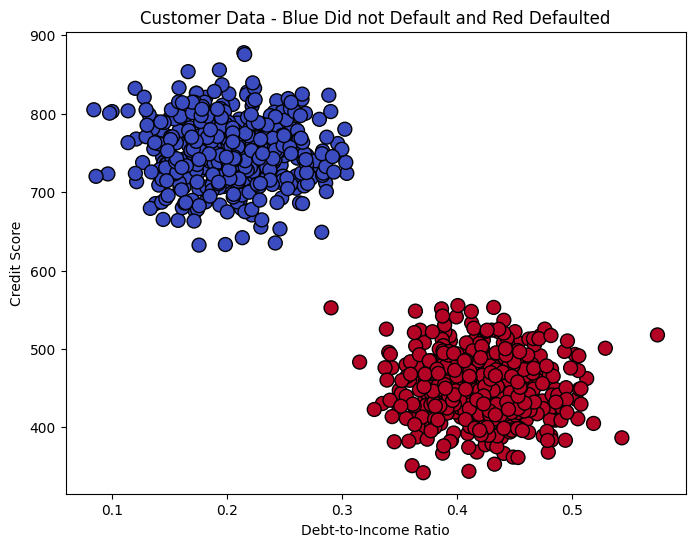

In [ ]:
#_@b00094970- Abdelrahman Feteha
#part a
plt.figure(figsize=(8, 6))
plt.scatter(
    features_dataset['debt_to_income_ratio'],
    features_dataset['credit_score'],
    c=labels,
    cmap='coolwarm',  # colorcoding the data using the defaulted
    s=100, #size of the points to be 100
    edgecolor='k',  # color of the circle edges is black
)

plt.ylabel('Credit Score')
plt.xlabel('Debt-to-Income Ratio')
plt.title('Customer Data - Blue Did not Default and Red Defaulted')
plt.show()

In [ ]:
#_@b00094970- Abdelrahman Feteha
#part b

#I already split the features and target---features_dataset, labels

#preprocess by standardising the features.
standardizer = StandardScaler()
features_dataset_standardized = standardizer.fit_transform(features_dataset)

#build the SVM classifier with 1e6
svm_model = SVC(kernel = 'linear', C=1e6)
svm_model.fit(features_dataset_standardized, labels)

SVC(C=1000000.0, kernel='linear')

In [ ]:
#_@b00094970- Abdelrahman Feteha
#part c- decission boundary and margins

# Extract model parameters
svm_intercept = svm_model.intercept_[0] #bias w0
svm_weights = svm_model.coef_[0] #coefficients for the input features
svm_support_vectors = svm_model.support_vectors_ #gets the support vectors so we can define the margin

# Print weights and bias
print("SVM Weights")
print("w0 =", np.round(svm_intercept, 3))  # Bias term
for i in range(len(svm_weights)):
    print("w{} = {}".format(i+1, np.round(svm_weights[i], 3)))  # Weight terms

SVM Weights
w0 = 0.164
w1 = 0.788
w2 = -3.128


[[-0.61201167  0.21803341]
 [-0.26122252  0.30624826]
 [-0.19082005 -0.31533275]]
There are 3 support vectors


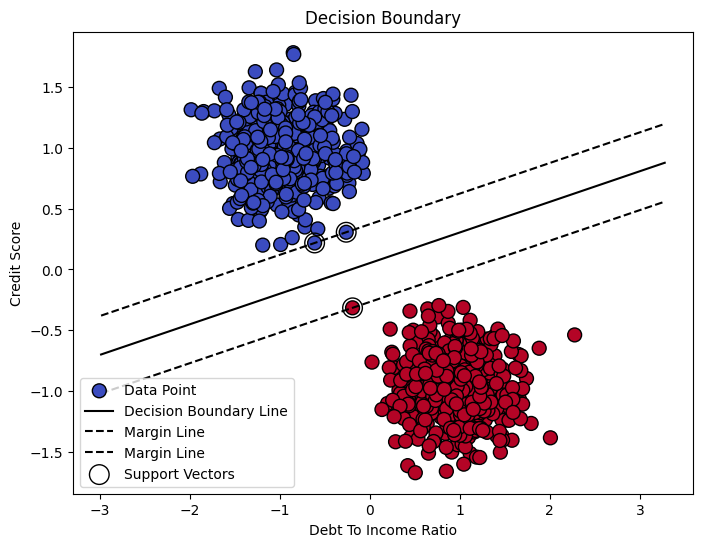

In [ ]:
# Print support vectors and count them
print(svm_support_vectors)
print("There are {} support vectors".format(svm_support_vectors.shape[0]))

# First we extract the first feature (debt-to-income ratio) for the x-axis
dbt_to_ic_ratio = features_dataset_standardized[:, 0]

# I Generate 500 x-values ranging from (min - 1) to (max + 1) of the first feature
x_values = np.linspace(
    dbt_to_ic_ratio.min() - 1,
    dbt_to_ic_ratio.max() + 1,
    500
)

# Calculate the decision boundary using the SVM formula:
# decision boundary: w1*x1 + w2*x2 + w0 = 0
# rearranged: x2 = -(w0/w2) - (w1/w2)*x1
decision_boundary = (
    -svm_intercept / svm_weights[1]
    - (svm_weights[0] / svm_weights[1]) * x_values
)

# Compute the margin: 1 / ||w||, but since we only need shift in y-axis (x2),
# and the slope is in terms of x1, we just use w2
margin = 1 / svm_weights[1]
margin_right = decision_boundary + margin
margin_left = decision_boundary - margin

#Plotting
plt.figure(figsize=(8, 6))

# Plot the original data (normalized)
plt.scatter(
    features_dataset_standardized[:, 0],  # x: debt-to-income ratio
    features_dataset_standardized[:, 1],  # y: credit score
    c=labels,
    cmap='coolwarm',
    s=100,
    edgecolor='black'
)

# Plot the decision boundary
plt.plot(x_values, decision_boundary, 'k-', label='Decision Boundary Line')

# Plot the margins
plt.plot(x_values, margin_right, 'k--', label='Margin Line')
plt.plot(x_values, margin_left, 'k--')

# Highlight the support vectors
plt.scatter(
    svm_support_vectors[:, 0],
    svm_support_vectors[:, 1],
    s=200,
    edgecolor='black',
    facecolor='none',
    label='Support Vectors'
)

# Label the axes
plt.xlabel("Debt To Income Ratio")
plt.ylabel("Credit Score")

# Add a title and legend
plt.title("Decision Boundary")
plt.legend(['Data Point', 'Decision Boundary Line', 'Margin Line', 'Margin Line', 'Support Vectors'])

# Show the plot
plt.show()

In [ ]:
#_@b00094970- Abdelrahman Feteha
#part d

# load the testing dataset
testing_dataset = pd.read_csv('customers_data_test.csv')
testing_dataset_features = testing_dataset.drop(columns=['default'])  # Features
testing_dataset_labels = testing_dataset['default']                   # Target labels

# standardize the testing dataset using the same scaler from training
testing_features_dataset_standardized = standardizer.transform(testing_dataset_features)

# make predictions on the standardized test data
predicted_labels = svm_model.predict(testing_features_dataset_standardized)

# print classification metrics
print(classification_report(
    testing_dataset_labels,
    predicted_labels,
    digits=3,
    target_names=['No Default', 'Default']
))

# calculate and display accuracy
model_accuracy = accuracy_score(predicted_labels, testing_dataset_labels)
print("The accuracy of the classifier is : ", np.round(model_accuracy, 3) * 100, "%")

              precision    recall  f1-score   support

  No Default      0.980     0.990     0.985       100
     Default      0.990     0.980     0.985       100

    accuracy                          0.985       200
   macro avg      0.985     0.985     0.985       200
weighted avg      0.985     0.985     0.985       200

The accuracy of the classifier is :  98.5 %


In [ ]:
#_@b00094970- Abdelrahman Feteha
#part e- Did not compile

# load the full dataset for training with extreme C
full_customers_data = pd.read_csv('customers_data_full.csv')

# separate features and labels
full_customers_features = full_customers_data.drop(columns=['default'])
full_customers_labels = full_customers_data['default']

# standardize the features using the same scaler object
full_customers_features_standard = standardizer.fit_transform(full_customers_features)

#use the large c value
svm_model_extremeC = SVC(kernel='linear', C=1e20)
# svm_model_extremeC.fit(full_customers_features_standard, full_customers_labels)

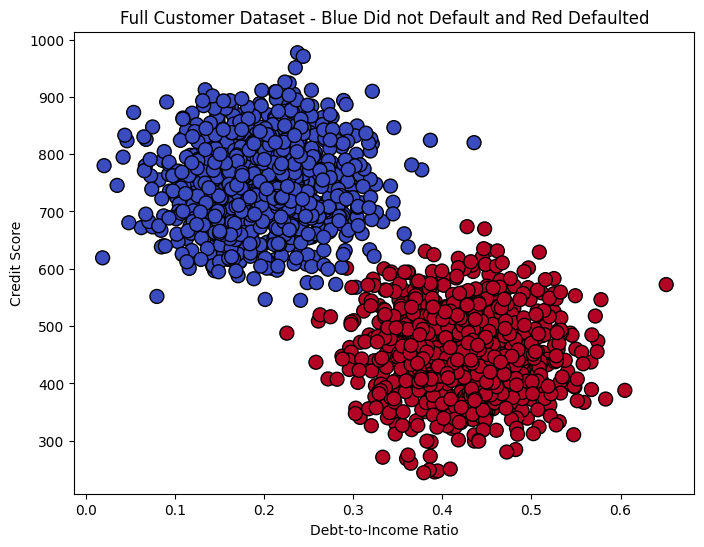

In [ ]:
#_@b00094970 - Abdelrahman Feteha
#Justifiying part f
plt.figure(figsize=(8, 6))
plt.scatter(
    full_customers_features['debt_to_income_ratio'],
    full_customers_features['credit_score'],
    c=full_customers_labels,
    cmap='coolwarm',  # colorcoding the data using the defaulted
    s=100,  # size of the points to be 100
    edgecolor='k',  # color of the circle edges is black
)

plt.ylabel('Credit Score')
plt.xlabel('Debt-to-Income Ratio')
plt.title('Full Customer Dataset - Blue Did not Default and Red Defaulted')
plt.show()


In [ ]:
#_@b00094970- Abdelrahman Feteha
#part g
svm_g = SVC(kernel='linear', C=10)
svm_g.fit(full_customers_features_standard, full_customers_labels)

SVC(C=10, kernel='linear')

In [ ]:
#_@b00094970 - Abdelrahman Feteha
# Part h

# List of C values to try
C_values = [0.01, 0.05, 0.1, 0.3, 0.7, 1.0]
svm_models = []

# Train an SVM for each C value and store the models
for c in C_values:
    model = SVC(kernel='linear', C=c)
    model.fit(full_customers_features_standard, full_customers_labels)
    svm_models.append(model)

# Predict on the same test set using each trained model
predictions_for_each_model = []
for model in svm_models:
    pred_labels = model.predict(testing_features_dataset_standardized)
    predictions_for_each_model.append(pred_labels)

# Show classification reports for each C value
for i, prediction in enumerate(predictions_for_each_model):
    print("Classification Report for Model with C = {}".format(C_values[i]))
    print(classification_report(
        testing_dataset_labels,
        prediction,
        digits=3,
        target_names=['No Default', 'Default']
    ))
    print("-----------------------------------------------------------")


Classification Report for Model with C = 0.01
              precision    recall  f1-score   support

  No Default      0.980     0.990     0.985       100
     Default      0.990     0.980     0.985       100

    accuracy                          0.985       200
   macro avg      0.985     0.985     0.985       200
weighted avg      0.985     0.985     0.985       200

-----------------------------------------------------------
Classification Report for Model with C = 0.05
              precision    recall  f1-score   support

  No Default      0.980     1.000     0.990       100
     Default      1.000     0.980     0.990       100

    accuracy                          0.990       200
   macro avg      0.990     0.990     0.990       200
weighted avg      0.990     0.990     0.990       200

-----------------------------------------------------------
Classification Report for Model with C = 0.1
              precision    recall  f1-score   support

  No Default      0.980     1.000 

In [ ]:
#_@b00094970 - Abdelrahman Feteha
# Part i
best_C_model = svm_models[-1]

# Get model weights and intercept
w0_svm_best = best_C_model.intercept_[0]
w_svm_best = best_C_model.coef_[0]

# Get the support vectors
best_C_support_vectors = best_C_model.support_vectors_

# Print the weights
print("w0 =", np.round(w0_svm_best, 3))
for i in range(len(w_svm_best)):
    print("w{} = {}".format(i+1, np.round(w_svm_best[i], 3)))

# Print support vector count
print(best_C_support_vectors)
print(f"There are {best_C_support_vectors.shape[0]}Support Vectors")



w0 = -0.013
w1 = 2.231
w2 = -2.81
[[ 0.06259618  0.19241394]
 [ 0.17881637  0.4931646 ]
 [-0.15803091  0.18357723]
 [-0.55816099 -0.3488742 ]
 [-0.06068481 -0.20878721]
 [-0.24240409 -0.1783534 ]
 [ 0.37161193  0.36350811]
 [-0.18830815  0.00478747]
 [ 0.40625675  0.22174751]
 [-0.49818021 -0.1594989 ]
 [ 0.5464009  -0.16162115]
 [-0.17468689  0.1418521 ]
 [-0.34763755  0.02870215]
 [-0.41582007 -0.15927622]
 [-0.31259077 -0.01527676]
 [ 0.10101162  0.1224017 ]
 [-0.1453812  -0.00498312]
 [ 0.56069576  0.17635552]
 [ 0.02767633 -0.3386457 ]
 [ 0.09265773 -0.12206382]
 [ 0.18991291 -0.01143894]
 [ 0.10277491 -0.18973183]
 [-0.09802161 -0.21088067]
 [-0.39815308 -0.57024309]
 [ 0.93515872  0.43969004]
 [ 0.2545536  -0.045674  ]
 [-0.38317847 -0.50342324]
 [-0.28924602 -0.52434769]
 [ 0.37574943 -0.04611247]
 [-0.68124538 -0.69983463]
 [ 0.24003574 -0.06676902]
 [ 0.04595887 -0.18586811]]
There are 32Support Vectors


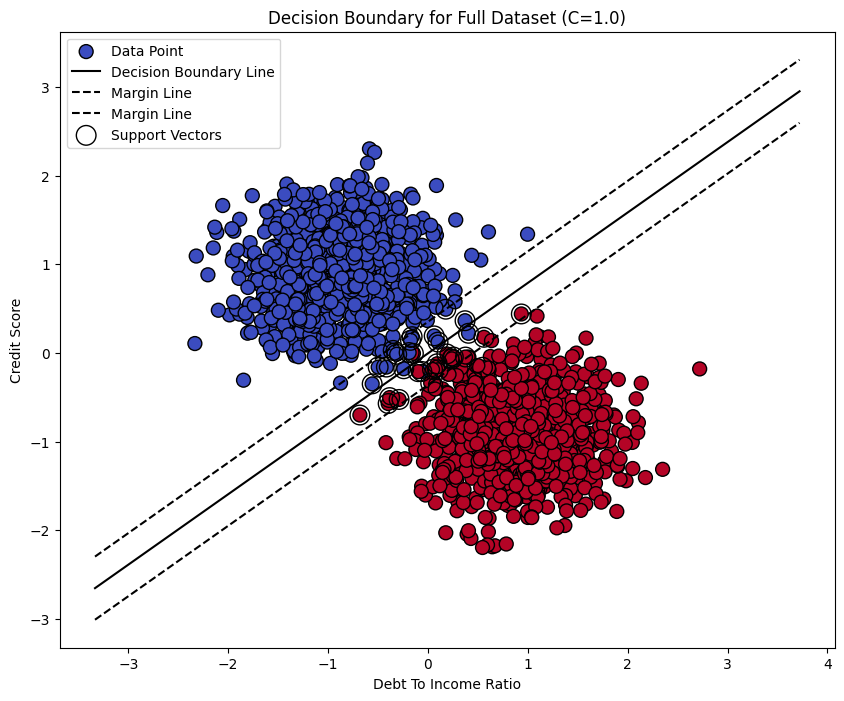

In [ ]:
# Create x-axis range for decision boundary
x_values_new = np.linspace(
    full_customers_features_standard[:, 0].min() - 1,
    full_customers_features_standard[:, 0].max() + 1,
    500
)

# Compute decision boundary: x2 = -(w0/w2) - (w1/w2)*x1
decision_boundary_best_C = (-w0_svm_best / w_svm_best[1]) - (w_svm_best[0] / w_svm_best[1]) * x_values_new

# Compute margin lines (±1/||w|| shifted along x2)
margin_best_C = 1 / w_svm_best[1]
margin_right_best_C = decision_boundary_best_C + margin_best_C
margin_left_best_C = decision_boundary_best_C - margin_best_C

# Plot everything
plt.figure(figsize=(10, 8))

# Plot full standardized dataset
plt.scatter(
    full_customers_features_standard[:, 0],
    full_customers_features_standard[:, 1],
    c=full_customers_labels,
    cmap='coolwarm',
    s=100,
    edgecolor='black'
)

# Plot decision boundary
plt.plot(x_values_new, decision_boundary_best_C, 'k-', label='Decision Boundary Line')

# Plot margin lines
plt.plot(x_values_new, margin_right_best_C, 'k--', label='Margin Line')
plt.plot(x_values_new, margin_left_best_C, 'k--')

# Plot support vectors
plt.scatter(
    best_C_support_vectors[:, 0],
    best_C_support_vectors[:, 1],
    s=200,
    edgecolor='black',
    facecolor='none',
    label='Support Vectors'
)

# Labels and title
plt.xlabel("Debt To Income Ratio")
plt.ylabel("Credit Score")
plt.title("Decision Boundary for Full Dataset (C=1.0)")
plt.legend(['Data Point', 'Decision Boundary Line', 'Margin Line', 'Margin Line', 'Support Vectors'])
plt.show()
